In [ ]:
#Ovija Vettimayilnathan (Student B)
#CIP02 F23 Projekt
#Gruppe 16
#Galaxus Cleaning

# File holen und laden

In [ ]:
import time
import csv
import pandas as pd
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt



# File holen
file_path = os.path.join(os.getcwd(), '..', 'Vettimayilnathan_Ovija_studentB_Data/Vettimayilnathan_Ovija_studentB_Data_stage2.csv')
# File lesen/laden
df_ProdInfo = pd.read_csv(file_path,
                            encoding='UTF-8')



# Übersicht

In [2]:
# zeigt die ersten 5 Zeilen
df_ProdInfo.head()

Unnamed: 0  price    brand          model   
0           0  499.–  Samsung  Galaxy A54 5G  \
1           0  399.–  Samsung  Galaxy A53 5G   
2           0  333.–   Google       Pixel 6a   
3           0  949.–  Samsung     Galaxy S23   
4           0  769.–    Apple      iPhone 14   

                                             details  
0  256 GB, Awesome Graphite, 6.40", Hybrid Dual S...  
1  128 GB, Awesome Blue, 6.50", Hybrid Dual SIM, ...  
2  128 GB, Charcoal, 6.10", SIM + eSIM, 12.20 Mpx...  
3       256 GB, Green, 6.10", SIM + eSIM, 50 Mpx, 5G  
4    128 GB, Midnight, 6.10", SIM + eSIM, 12 Mpx, 5G

In [3]:
# zeigt willkürlich 3 Zeilen an
df_ProdInfo.sample(3)

Unnamed: 0   price    brand        model   
147           0   678.–  Samsung   Galaxy S22  \
925           0   449.–   Xiaomi      Poco F4   
210           0  1249.–  Samsung  Galaxy S23+   

                                               details  
147     256 GB, Pink Gold, 6.10", Dual SIM, 50 Mpx, 5G  
925  256 GB, Nebula Green, 6.67", Dual SIM, 64 Mpx, 5G  
210       512 GB, Cream, 6.60", SIM + eSIM, 50 Mpx, 5G

In [4]:
# zeigt wie viele Zeilen pro Spalte vorhanden
df_ProdInfo.count()

Unnamed: 0    2040
price         2040
brand         2040
model         2040
details       2040
dtype: int64

In [5]:
# Zeigt die Spalten, Anzahl NICHT NULL Werten und den Datentyp pro Spalte
df_ProdInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2040 non-null   int64 
 1   price       2040 non-null   object
 2   brand       2040 non-null   object
 3   model       2040 non-null   object
 4   details     2040 non-null   object
dtypes: int64(1), object(4)
memory usage: 79.8+ KB


# Spalte teilen und neue Spalten generieren

In [6]:
# die letzte Spalte enthaltet diverse Informationen
# die Spalte wird nun aufgeteilt auf mehrere Spalten, dabei dient ',' als Indikator für eine neue Spalte
split_prod = df_ProdInfo.iloc[:, 4].str.split(',', expand=True) 

# die neuen Spalten werden entsprechend beschriftet
df_ProdInfo['Speicher'] = split_prod[0]
df_ProdInfo['Farbe'] = split_prod[1]
df_ProdInfo['Display'] = split_prod[2]
df_ProdInfo['SIM'] = split_prod[3]
df_ProdInfo['Kamera'] = split_prod[4]
df_ProdInfo['Mobilfunk'] = split_prod[5]
df_ProdInfo.columns.values[1] = 'Preis'
df_ProdInfo.columns.values[2] = 'Marke'
df_ProdInfo.columns.values[3] = 'Modell'
df_ProdInfo.columns.values[4] = 'Spezifikationen'

In [7]:
df_ProdInfo.sample(3)

Unnamed: 0  Preis    Marke                       Modell   
1510           0  140.–  Oukitel  WP20 Dual-SIM 4/32GB Orange  \
1318           0  136.–      ZTE                    Blade A72   
1570           0  259.–     Vivo                       V21 5G   

                                        Spezifikationen Speicher   
1510                                   Orange, Dual SIM   Orange  \
1318    64 GB, Grau, 6.75", Hybrid Dual SIM, 13 Mpx, 4G    64 GB   
1570  128 GB, Sunset Dazzle, 6.44", Hybrid Dual SIM,...   128 GB   

               Farbe Display               SIM   Kamera Mobilfunk  
1510        Dual SIM    None              None     None      None  
1318            Grau   6.75"   Hybrid Dual SIM   13 Mpx        4G  
1570   Sunset Dazzle   6.44"   Hybrid Dual SIM   64 Mpx        5G

# Cleaning

## Duplikate entfernen

In [8]:
# Identifizieren ob Duplikate vorhanden sind
dupl = df_ProdInfo.duplicated()
print(dupl.sum())

129


In [9]:
# Duplikate entfernen
df_ProdInfo.drop_duplicates()

Unnamed: 0  Preis    Marke         Modell   
0              0  499.–  Samsung  Galaxy A54 5G  \
1              0  399.–  Samsung  Galaxy A53 5G   
2              0  333.–   Google       Pixel 6a   
3              0  949.–  Samsung     Galaxy S23   
4              0  769.–    Apple      iPhone 14   
...          ...    ...      ...            ...   
2034           0  41.40   Maxcom         MK 241   
2035           0  309.–     OPPO            A74   
2036           0  499.–   Google       Pixel 7a   
2037           0  499.–   Google       Pixel 7a   
2038           0  499.–   Google       Pixel 7a   

                                        Spezifikationen Speicher   
0     256 GB, Awesome Graphite, 6.40", Hybrid Dual S...   256 GB  \
1     128 GB, Awesome Blue, 6.50", Hybrid Dual SIM, ...   128 GB   
2     128 GB, Charcoal, 6.10", SIM + eSIM, 12.20 Mpx...   128 GB   
3          256 GB, Green, 6.10", SIM + eSIM, 50 Mpx, 5G   256 GB   
4       128 GB, Midnight, 6.10", SIM + eSIM, 12 Mpx, 5G   128 GB   
...                                                 ...      ...   
2034       0.51 GB, Black, 3.20", Single SIM, 5 Mpx, 4G  0.51 GB   
2035   128 GB, Fluid Black, 6.50", Dual SIM, 48 Mpx, 4G   128 GB   
2036         128 GB, Sea, 6.10", Single SIM, 64 Mpx, 5G   128 GB   
2037        128 GB, Snow, 6.10", Single SIM, 64 Mpx, 5G   128 GB   
2038    128 GB, Charcoal, 6.10", Single SIM, 64 Mpx, 5G   128 GB   

                  Farbe Display               SIM      Kamera Mobilfunk  
0      Awesome Graphite   6.40"   Hybrid Dual SIM      50 Mpx        5G  
1          Awesome Blue   6.50"   Hybrid Dual SIM      64 Mpx        5G  
2              Charcoal   6.10"        SIM + eSIM   12.20 Mpx        5G  
3                 Green   6.10"        SIM + eSIM      50 Mpx        5G  
4              Midnight   6.10"        SIM + eSIM      12 Mpx        5G  
...                 ...     ...               ...         ...       ...  
2034              Black   3.20"        Single SIM       5 Mpx        4G  
2035        Fluid Black   6.50"          Dual SIM      48 Mpx        4G  
2036                Sea   6.10"        Single SIM      64 Mpx        5G  
2037               Snow   6.10"        Single SIM      64 Mpx        5G  
2038           Charcoal   6.10"        Single SIM      64 Mpx        5G  

[1911 rows x 11 columns]

## Strings ersetzen/entfernen

In [10]:
df_ProdInfo['Preis'].describe()

count      2040
unique      909
top       179.–
freq         29
Name: Preis, dtype: object

In [11]:
df_ProdInfo['Display'].describe()

count       1851
unique       116
top        6.10"
freq         185
Name: Display, dtype: object

In [12]:
# die meisten Werte in der Display Spalte beinhalten noch den Zoll Zeichen ". Diesen Zeichen entfernen.
# zusätzlich enden gewisse Zahlen mit einem Null, diesen Null braucht es nicht (relevant für den Merge später), also ebenfall entfernen
df_ProdInfo['Display'] = df_ProdInfo['Display'].str.replace('0"', '')
df_ProdInfo['Display'] = df_ProdInfo['Display'].str.replace('"', '')

df_ProdInfo['Display'].describe()

count     1851
unique     116
top        6.1
freq       185
Name: Display, dtype: object

In [13]:
# gewisse Preise enden mit dem Zeichen .- andere wiederum nicht
# .- entfernen mit Regex
df_ProdInfo['Preis'] = df_ProdInfo['Preis'].replace('.–', '', regex=True)
df_ProdInfo['Preis'].describe()

count     2040
unique     909
top        179
freq        29
Name: Preis, dtype: object

In [14]:
# zeigt an wie viele Werte pro Spalte vorhanden sind.
df_ProdInfo.count()

Unnamed: 0         2040
Preis              2040
Marke              2040
Modell             2040
Spezifikationen    2040
Speicher           2040
Farbe              1986
Display            1851
SIM                1710
Kamera             1616
Mobilfunk          1531
dtype: int64

## Fehlende Werte (Missing Values)

### NA identifizieren

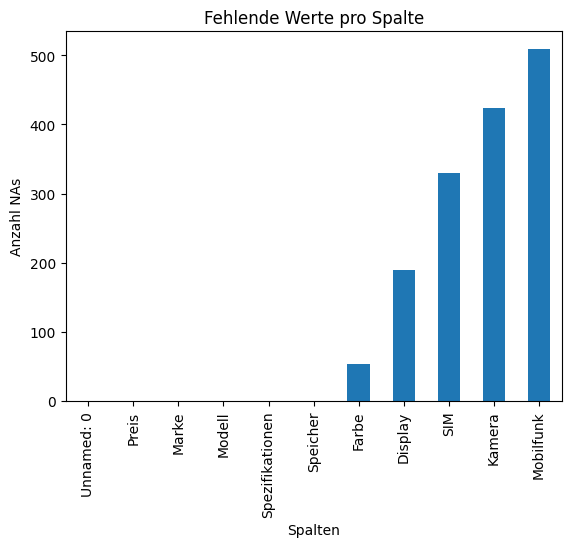

In [15]:
missing_values = df_ProdInfo.isnull().sum()

missing_values.plot(kind='bar')
plt.xlabel('Spalten')
plt.ylabel('Anzahl NAs')
plt.title('Fehlende Werte pro Spalte')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Zeigt alle Zeilen, die ein NA haben 
print(df_ProdInfo[df_ProdInfo.isnull().any(axis=1)])

      Unnamed: 0  Preis    Marke                                    Modell   
222            0  65.70  Emporia                           Simplicity Glam  \
267            0  65.80  Emporia                                Simplicity   
407            0  15.90   Maxcom                                    MM 111   
485            0   1199   Huawei                                   P60 Pro   
543            0    182     OPPO     SM OPPO A54S BLUE 6,5" 4+128GB DS ITA   
...          ...    ...      ...                                       ...   
2016           0    149     OPPO  A54s Dual Sim 128GB, 4GB RAM, Pearl Blue   
2022           0  59.90   Archos     CELLULARE ARCHOS SAPHIR 24F 2,4" IP68   
2023           0     60      SPC          FORTUNE 2 48MB+128MB DS 4G BLACK   
2024           0  46.60   Brondi                             AMICO DI CASA   
2030           0  44.20      SPC                        MOBILE TITAN BLACK   

                                  Spezifikationen    Speicher  

In [17]:
# Summe der fehlenden Werte pro Spalte

print(df_ProdInfo.isnull().sum())

Unnamed: 0           0
Preis                0
Marke                0
Modell               0
Spezifikationen      0
Speicher             0
Farbe               54
Display            189
SIM                330
Kamera             424
Mobilfunk          509
dtype: int64


### Mobilfunk NA ersetzen

In [18]:
# die meisten NAs haben wir in der Spalte Mobilfunkt. Diese Spalte könnte zu einem späteren Zeitpunkt wichtig sein für den Merge
# als erstes die Anzahl NAs in der Spalte Mobilfunk anzeigen, danach prüfen ob in der Spalte Modell oder Kamera die Werte '4G' oder '5G' vorhanen sind (dabei die NAs in der Spalte Kamera ignorieren)und diese in der Spalte Mobilfunk einfügen
# Spalte Modell, weil bei 4G udn 5G Technologie ist dies meist ein Teil vom Modellnamen
# Spalte Kamera, weil dise vor Mobilfunk kommt. Im Falle, dass sich beim Split weiter oben gewisse Werte verschoben haben

print("Anzahl NA in der Spalte Mobilfunk vor dem Cleaning:", df_ProdInfo['Mobilfunk'].isnull().sum())

df_ProdInfo.loc[df_ProdInfo['Modell'].str.contains('2G'), 'Mobilfunk'] = '2G'
df_ProdInfo.loc[df_ProdInfo['Modell'].str.contains('3G'), 'Mobilfunk'] = '3G'
df_ProdInfo.loc[df_ProdInfo['Modell'].str.contains('4G'), 'Mobilfunk'] = '4G'
df_ProdInfo.loc[df_ProdInfo['Modell'].str.contains('5G'), 'Mobilfunk'] = '5G'



df_ProdInfo.loc[df_ProdInfo['Kamera'].str.contains('2G', na=False), 'Mobilfunk'] = '2G'
df_ProdInfo.loc[df_ProdInfo['Kamera'].str.contains('3G', na=False), 'Mobilfunk'] = '3G'
df_ProdInfo.loc[df_ProdInfo['Kamera'].str.contains('4G', na=False), 'Mobilfunk'] = '4G'
df_ProdInfo.loc[df_ProdInfo['Kamera'].str.contains('5G', na=False), 'Mobilfunk'] = '5G'

print("Anzahl NA in der Spalte Mobilfunk nach dem Cleaning:", df_ProdInfo['Mobilfunk'].isnull().sum())

Anzahl NA in der Spalte Mobilfunk vor dem Cleaning: 509
Anzahl NA in der Spalte Mobilfunk nach dem Cleaning: 280


### Kamera NA ersetzen

In [19]:
# die zweitmeisten NAs haben wir in der Spalte Kamera. Diese Spalte ist aber nicht relevant für später
# als erstes die Anzahl NAs in der Spalte Kamera anzeigen, danach prüfen ob in der Spalte SIM die Zeichenfolge 'Mpx' vorhanden ist dabei die NAs in der Spalte SIM ignorieren)
# wenn ja dann den gesamten Wert kopieren in die Spalte Kamera
# dabei werden nicht nur NA ersetzt sondern auch falsche Werte


print("Anzahl NA in der Spalte Kamera vor dem Cleaning:", df_ProdInfo['Kamera'].isnull().sum())

mpx_sim = df_ProdInfo.loc[df_ProdInfo['SIM'].str.contains('Mpx', na=False)]
df_ProdInfo.loc[mpx_sim.index, 'Kamera'] = mpx_sim['SIM']

mpx_funk = df_ProdInfo.loc[df_ProdInfo['Mobilfunk'].str.contains('Mpx', na=False)]
df_ProdInfo.loc[mpx_funk.index, 'Kamera'] = mpx_funk['Mobilfunk']

print("Anzahl NA in der Spalte Kamera nach dem Cleaning:", df_ProdInfo['Kamera'].isnull().sum())

Anzahl NA in der Spalte Kamera vor dem Cleaning: 424
Anzahl NA in der Spalte Kamera nach dem Cleaning: 407


### Display NA ersetzen

In [20]:
# Auch hier gehen wir wieder prüfen, ob sich in der vorangehenden Spalte die Zollgrösse verirrt hat. Diese identifizieren wir anhand vom Zeichen "
# dabei werden nicht nur NA ersetzt sondern auch falsche Werte


print("Anzahl NA in der Spalte Display vor dem Cleaning:", df_ProdInfo['Display'].isnull().sum())

display_col = df_ProdInfo.loc[df_ProdInfo['Farbe'].str.contains('"', na=False)]
df_ProdInfo.loc[display_col.index, 'Display'] = display_col['Farbe']

display_sim = df_ProdInfo.loc[df_ProdInfo['SIM'].str.contains('"', na=False)]
df_ProdInfo.loc[display_sim.index, 'Display'] = display_sim['Farbe']

print("Anzahl NA in der Spalte Display nach dem Cleaning:", df_ProdInfo['Display'].isnull().sum())
#Es sieht so aus als wurden hier keine Datensätze ersetzt, aber das könnte täuschen. Vielleicht wurden Daten korrigiert, die nicht leer sondern falsch waren

Anzahl NA in der Spalte Display vor dem Cleaning: 189
Anzahl NA in der Spalte Display nach dem Cleaning: 189


### Farbe ersetzen

In [21]:
#nun ist nur noch die Spalte Farbe übrig mit NAs. Da es fast unmöglich ist, die Farben zu identifizieren in den anderen Spalten lassen wir dies so sein. In einem spöteren Schritt werden diese Zeilen dann entfernt

df_ProdInfo.sample(3)

Unnamed: 0  Preis   Marke   
1956           0  88.80  Xiaomi  \
1179           0    450  Huawei   
791            0    199    Doro   

                                                 Modell   
1956  Redmi (6.53") Dual SIM Android 11 Micro-USB Green  \
1179                                            P40 Pro   
791                                                8100   

                                        Spezifikationen Speicher      Farbe   
1956                                     Gold, Dual SIM     Gold   Dual SIM  \
1179  256 GB, Black, 6.58", Hybrid Dual SIM + eSIM, ...   256 GB      Black   
791       32 GB, Schwarz, 6.10", Single SIM, 13 Mpx, 4G    32 GB    Schwarz   

     Display                      SIM   Kamera Mobilfunk  
1956    None                     None     None      None  
1179    6.58   Hybrid Dual SIM + eSIM   50 Mpx        5G  
791      6.1               Single SIM   13 Mpx        4G

## Spalten entfernen

In [22]:
# die erste Spalte ist eine automatisch erstellte Spalte und nicht relevant für uns, daher löschen
df_ProdInfo.drop(df_ProdInfo.columns[0], axis=1,inplace=True)

df_ProdInfo.sample(3)

Preis    Marke                 Modell   
1849    543   realme                GT2 Pro  \
1084  85.20  Alcatel               SM1 2021   
452     319   Xiaomi  Redmi Note 11 Pro+ 5G   

                                        Spezifikationen Speicher   
1849   128 GB, paper white, 6.70", Dual SIM, 50 Mpx, 5G   128 GB  \
1084              8 GB, Blue, 5", Single SIM, 5 Mpx, 4G     8 GB   
452   128 GB, Star Blue, 6.67", Hybrid Dual SIM, 108...   128 GB   

             Farbe Display               SIM    Kamera Mobilfunk  
1849   paper white     6.7          Dual SIM    50 Mpx        5G  
1084          Blue       5        Single SIM     5 Mpx        4G  
452      Star Blue    6.67   Hybrid Dual SIM   108 Mpx        5G

In [23]:
# die Spalte 'Spezifikation' haben wir aufgesplittet, daher wäre diese auch nicht mehr nötig
df_ProdInfo.drop(columns=['Spezifikationen'], inplace=True, axis=1)

df_ProdInfo.sample(3)

Preis    Marke                                     Modell  Speicher   
1346   264   Xiaomi                              Redmi Note 11    128 GB  \
1930   109  Oukitel  Phone Oukitel C25 Dual SIM 4 / 32GB Black  Dual SIM   
516    768    Apple                             iPhone 12 mini    256 GB   

           Farbe Display          SIM   Kamera Mobilfunk  
1346   Star Blue    6.43     Dual SIM   50 Mpx        4G  
1930        None    None         None     None        2G  
516        Green     5.4   SIM + eSIM   12 Mpx        5G

In [24]:
# die Spalte SIM ist in dieser Arbeit für uns von keinem Nutzen, daher auch gleich entfernen
df_ProdInfo.drop(columns=['SIM'], inplace=True, axis=1)

df_ProdInfo.sample(3)

Preis   Marke                                Modell Speicher   
1432    209  Xiaomi                              Poco M5s    64 GB  \
1310    349  Xiaomi                     Redmi Note 10 Pro    64 GB   
1798  61.90   Nokia  Phone Nokia 210 Dual SIM TA-1139 red      Red   

                 Farbe Display    Kamera Mobilfunk  
1432             Weiss    6.42    64 Mpx        4G  
1310   Bronze Gradient    6.67   108 Mpx        4G  
1798          Dual SIM    None      None      None

## Falsche/ungültige Daten ändern

### Preis

In [25]:
# Bevor wir den Datentyp zu float/numeric ändern, müssen wir prüefen, ob es gewisse Werte gibt, die nicht geändert werden können, weil sie z.B. Strings beinhalten

price_nonum = df_ProdInfo['Preis'].str.contains('[a-zA-Z]', regex = True)
print(df_ProdInfo[price_nonum])

     Preis Marke               Modell Speicher  Farbe Display   Kamera   
914  284Fr  Doro  8100 + Watch Bundle    32 GB   Grau    Rosa   13 Mpx  \

    Mobilfunk  
914    13 Mpx  


In [26]:
# Fr entfernen vom Preis in der 914 Zeile

df_ProdInfo['Preis'] = df_ProdInfo['Preis'].str.replace('Fr','')
split_prod = df_ProdInfo.iloc[:, 4].str.split(',', expand=True) 
print(df_ProdInfo[price_nonum])

    Preis Marke               Modell Speicher  Farbe Display   Kamera   
914   284  Doro  8100 + Watch Bundle    32 GB   Grau    Rosa   13 Mpx  \

    Mobilfunk  
914    13 Mpx  


### Marke

In [27]:
# die Marken, die weniger als 5 Produkte/Zeilen haben herausfiltern und verifizieren ob Fehler in der Bezeichnung liegen
brand_count = df_ProdInfo['Marke'].value_counts()

brand_less = brand_count[brand_count < 5]
print(brand_less)

Marke
Olympia            4
i-Pro              4
Acer               4
Estar              4
Hammer             4
Cyrus              4
Zanco              3
Nubia              3
Onda               3
Denver             3
SPC                3
EL                 3
Doogee             2
Blaupunkt          2
Energizer          2
amplicom           2
Telekom            2
König & Ebhardt    2
Telefunken         2
iGet               2
Funke              2
HTC                2
Artfone            2
Celly              1
BearTech           1
Sponge             1
Samsuing           1
BlackBerry         1
Umi                1
Carbon Mobile      1
Umidigi            1
Ordissimo          1
Aple               1
Swissvoice         1
Rephone            1
Philips            1
Archos             1
Name: count, dtype: int64


In [28]:
# gefundene Fehler korrigieren - Samsuing zu Samsung und Aple zu Apple
df_ProdInfo['Marke'] = df_ProdInfo['Marke'].str.replace('Samsuing', 'Samsung')
df_ProdInfo['Marke'] = df_ProdInfo['Marke'].str.replace('Aple', 'Apple')

#erneut testen
brand_count = df_ProdInfo['Marke'].value_counts()
brand_less = brand_count[brand_count < 5]
print(brand_less)

Marke
Olympia            4
Cyrus              4
Acer               4
Estar              4
Hammer             4
i-Pro              4
EL                 3
Onda               3
Zanco              3
SPC                3
Denver             3
Nubia              3
Telefunken         2
Funke              2
Doogee             2
iGet               2
König & Ebhardt    2
Artfone            2
HTC                2
amplicom           2
Energizer          2
Blaupunkt          2
Telekom            2
Sponge             1
BearTech           1
Celly              1
Carbon Mobile      1
Umi                1
Swissvoice         1
BlackBerry         1
Umidigi            1
Ordissimo          1
Rephone            1
Philips            1
Archos             1
Name: count, dtype: int64


### 

### Mobilfunk

In [29]:
# bis zu 100 Zeilen anzeigen
pd.set_option('display.max_rows',100 )
#identifizieren welceh Mobilfunk Werte kein 'G' enthalten
wrong_funk = df_ProdInfo[(df_ProdInfo['Mobilfunk'].str.contains('G') == False)]
print(wrong_funk)

       Preis        Marke                         Modell Speicher   
118    81.30       Xiaomi                       Redmi A1    32 GB  \
154      225      Emporia                        Smart 5    32 GB   
439      199      Oukitel                        WP5 Pro    64 GB   
471      141     Motorola                       Moto G31    64 GB   
476    70.80        Nokia                        5710 XA  0.13 GB   
510      132    Blackview                         BV4900    32 GB   
520      211        Honor                             X8   128 GB   
559   111.20       Xiaomi                       Redmi 9A    32 GB   
569      229       realme                            C55   256 GB   
581      132      Olympia                            Neo    16 GB   
617      240       realme                             10   128 GB   
631      299    Blackview                         BV8800   128 GB   
640      155      Oukitel                           WP18    32 GB   
680      309    Blackview         

In [30]:
#gemäss Output oben können all diese Werte entfernt werden
df_ProdInfo.loc[df_ProdInfo['Mobilfunk'].str.contains('G') == False, 'Mobilfunk'] = None

In [31]:
# Anzahl Werte pro Variante prüfen
funk_count = df_ProdInfo['Mobilfunk'].value_counts()
print(funk_count)

Mobilfunk
 5G    668
 4G    540
5G     238
4G     182
2G      48
 3G     13
3G      10
Name: count, dtype: int64


In [32]:
#bei gewissen Werten schein noch ein Leerschlg zu Beginn zu sein - diese entfernen
df_ProdInfo['Mobilfunk'] = df_ProdInfo['Mobilfunk'].str.replace(' ','')

In [33]:
# verifizieren
funk_count = df_ProdInfo['Mobilfunk'].value_counts()
print(funk_count)

Mobilfunk
5G    906
4G    722
2G     48
3G     23
Name: count, dtype: int64


### Kamera

In [34]:
# bis zu 100 Zeilen anzeigen
pd.set_option('display.max_rows',100 )
#identifizieren welceh Kamera Werte kein 'Mpx' enthalten
wrong_cam = df_ProdInfo[(df_ProdInfo['Kamera'].str.contains('Mpx') == False)]
print(wrong_cam)

       Preis           Marke   
220      146            Doro  \
222    65.70         Emporia   
259      360          Xiaomi   
267    65.80         Emporia   
366      189            OPPO   
407    15.90          Maxcom   
514    43.90           Nokia   
554    57.80           Nokia   
621    46.07           Nokia   
716    54.90           Nokia   
746    65.90         Evolveo   
814    51.90           Nokia   
862    62.90           Nokia   
890    68.80         Emporia   
916      191         Bea-Fon   
922      330           Honor   
957      270         Oukitel   
970       87           Nokia   
976      208          Xiaomi   
979      181         Ulefone   
1003     101        Motorola   
1021     513          realme   
1060   78.90        Aligator   
1094     195         Myphone   
1101   64.90         Artfone   
1139   40.90            Onda   
1140     192         Bea-Fon   
1143  204.01          Hammer   
1158     264         Myphone   
1221     189            Vivo   
1240   6

In [35]:
zoll_cam = df_ProdInfo.loc[df_ProdInfo['Kamera'].str.contains('"', na=False)]
df_ProdInfo.loc[zoll_cam.index, 'Kamera'] = zoll_cam['Display']

In [36]:
#gemäss Output oben können all diese Werte entfernt werden
df_ProdInfo.loc[df_ProdInfo['Kamera'].str.contains('Mpx') == False, 'Kamera'] = None

In [37]:
# bis zu 100 Zeilen anzeigen
pd.set_option('display.max_rows',100 )
#identifizieren welceh Kamera Werte kein 'Mpx' enthalten
wrong_cam = df_ProdInfo[(df_ProdInfo['Kamera'].str.contains('Mpx') == False)]
print(wrong_cam)

Empty DataFrame
Columns: [Preis, Marke, Modell, Speicher, Farbe, Display, Kamera, Mobilfunk]
Index: []


In [38]:
#Zum Schluss noch 'Mpx' entfernen
df_ProdInfo['Kamera'] = df_ProdInfo['Kamera'].str.replace('Mpx','')
df_ProdInfo.head()

Preis    Marke         Modell Speicher              Farbe Display   Kamera   
0   499  Samsung  Galaxy A54 5G   256 GB   Awesome Graphite     6.4      50   \
1   399  Samsung  Galaxy A53 5G   128 GB       Awesome Blue     6.5      64    
2   333   Google       Pixel 6a   128 GB           Charcoal     6.1   12.20    
3   949  Samsung     Galaxy S23   256 GB              Green     6.1      50    
4   769    Apple      iPhone 14   128 GB           Midnight     6.1      12    

  Mobilfunk  
0        5G  
1        5G  
2        5G  
3        5G  
4        5G

### Farbe

In [39]:
# die Farben, die nur ein Produkt/Zeile haben herausfiltern und verifizieren ob Fehler in der Bezeichnung liegen
col_count = df_ProdInfo['Farbe'].value_counts()
pd.set_option('display.max_rows',200 )

col_less = col_count[col_count == 1]
print(col_less)
print(col_less.sum())

Farbe
 Lagoon Blue              1
 Glacier Grey             1
 Green Speckled           1
 electric purple          1
 Meteor Black             1
 Moonlight Silver         1
 Slate Gray               1
 Blue Vegan Leather       1
 Frosted Silver           1
 Eclipse Black            1
 Silver Frost             1
 Celestial black          1
 Bronze Gradient          1
 Noir Black               1
 Alpha Grey               1
 Flame Red                1
 Sand Gold                1
 Horizon Blue             1
 Liquid Mercury           1
 Blue Void                1
 Titan                    1
 Navy                     1
 Eternal Green            1
 Chrom                    1
 Gold Platinum            1
 Multicolour              1
 Arctic Silver            1
 Gloss Black              1
 Jet Black                1
 Frost White              1
 Glaze Black              1
 Deep Black               1
 Ice                      1
 Azure Blue               1
 Bamboo green             1
 Maroon Red   

In [40]:
zoll_col = df_ProdInfo.loc[df_ProdInfo['Farbe'].str.contains('"', na=False)]
df_ProdInfo.loc[zoll_cam.index, 'Farbe'] = zoll_cam['Display']

In [41]:
#alle ungültigen Argumente entfernen
df_ProdInfo.loc[df_ProdInfo['Farbe'].str.contains('"') == True, 'Farbe'] = None
df_ProdInfo.loc[df_ProdInfo['Farbe'].str.contains('SIM') == True, 'Farbe'] = None
df_ProdInfo.loc[df_ProdInfo['Farbe'].str.contains('2G') == True, 'Farbe'] = None
df_ProdInfo.loc[df_ProdInfo['Farbe'].str.contains('3G') == True, 'Farbe'] = None
df_ProdInfo.loc[df_ProdInfo['Farbe'].str.contains('4G') == True, 'Farbe'] = None
df_ProdInfo.loc[df_ProdInfo['Farbe'].str.contains('5G') == True, 'Farbe'] = None


### Display

In [42]:
# Bevor wir den Datentyp zu float/numeric ändern, müssen wir prüefen, ob es gewisse Werte gibt, die nicht geändert werden können, weil sie z.B. Strings beinhalten
pd.set_option('display.max_rows',400)

disp_nonum = df_ProdInfo['Display'].str.contains('[a-zA-Z]', regex = True, na=False)
print(df_ProdInfo[disp_nonum])

print(df_ProdInfo[disp_nonum].count())

       Preis            Marke   
118    81.30           Xiaomi  \
154      225          Emporia   
220      146             Doro   
259      360           Xiaomi   
366      189             OPPO   
407    15.90           Maxcom   
439      199          Oukitel   
476    70.80            Nokia   
510      132        Blackview   
514    43.90            Nokia   
520      211            Honor   
559   111.20           Xiaomi   
569      229           realme   
581      132          Olympia   
605      109             Doro   
617      240           realme   
631      299        Blackview   
640      155          Oukitel   
663      119           realme   
680      309        Blackview   
703      111         Rug Gear   
746    65.90          Evolveo   
774      145        Energizer   
793    59.20          Myphone   
839   115.21          Emporia   
845    80.20           Maxcom   
862    62.90            Nokia   
863    85.70             Doro   
868      252        Blackview   
875    97.

In [43]:
#Werte korrigieren
df_ProdInfo.loc[df_ProdInfo['Display'].str.contains('2G', na=False), 'Mobilfunk'] = '2G'
df_ProdInfo.loc[df_ProdInfo['Display'].str.contains('3G', na=False), 'Mobilfunk'] = '3G'
df_ProdInfo.loc[df_ProdInfo['Display'].str.contains('4G', na=False), 'Mobilfunk'] = '4G'
df_ProdInfo.loc[df_ProdInfo['Display'].str.contains('5G', na=False), 'Mobilfunk'] = '5G'
mpx_disp = df_ProdInfo.loc[df_ProdInfo['Display'].str.contains('Mpx', na=False)]
df_ProdInfo.loc[mpx_disp.index, 'Kamera'] = mpx_disp['Display']

In [44]:
#restliche Werte auf NA setzen in dem wir die Spalte zu numeric Typ konvertieren. Mit errors='coerce' werden alle nicht numerische Werte gelöscht bzw. zu NA geändert
df_ProdInfo['Display'] = df_ProdInfo['Display'].apply(pd.to_numeric, errors='coerce')

### Speicher

In [45]:
#herausfiltern ob gewisse Speicherwerte auch MB oder TB beinhalten
df_ProdInfo[df_ProdInfo['Speicher'].str.contains('MB|TB', na=False, regex=True)]

Empty DataFrame
Columns: [Preis, Marke, Modell, Speicher, Farbe, Display, Kamera, Mobilfunk]
Index: []

In [46]:
#identifizieren welche Speicherwerte Werte kein 'GB', da es wie oben ersichtlich ist keine Werte mit GB oder MB gibt
wrong_mem = df_ProdInfo[(df_ProdInfo['Speicher'].str.contains('GB') == False)]
print(wrong_mem)

       Preis           Marke   
543      182            OPPO  \
615     1068           Honor   
651    99.30      Telefunken   
663      119          realme   
746    65.90         Evolveo   
815    30.40     Krüger&Matz   
824    32.60           Nokia   
875    97.10         Infinix   
894    79.70            Doro   
897      259          Xiaomi   
903      329         OnePlus   
909    88.80         Emporia   
917      359         Ulefone   
918    28.90        Aligator   
936      321         Ulefone   
950    58.90         Evolveo   
959    70.60         Bea-Fon   
980      159         Oukitel   
1006     169           Cubot   
1009     139       Blackview   
1018     214           Cubot   
1019     159        Motorola   
1037     138         Ulefone   
1039     136         Oukitel   
1055     129            Doro   
1060   78.90        Aligator   
1065   41.90         Gigaset   
1066   43.30          Maxcom   
1070   33.90          Maxcom   
1073  315.70           Cubot   
1074   3

In [47]:
#diese Werte auf NA setzen
df_ProdInfo.loc[df_ProdInfo['Speicher'].str.contains('GB') == False, 'Speicher'] = None

In [48]:
#verifizieren
wrong_mem = df_ProdInfo[(df_ProdInfo['Speicher'].str.contains('GB') == False)]
print(wrong_mem)

Empty DataFrame
Columns: [Preis, Marke, Modell, Speicher, Farbe, Display, Kamera, Mobilfunk]
Index: []


In [49]:
#Zum Schluss noch 'GB' entfernen
df_ProdInfo['Speicher'] = df_ProdInfo['Speicher'].str.replace('GB','')
df_ProdInfo.head()

Preis    Marke         Modell Speicher              Farbe  Display   Kamera   
0   499  Samsung  Galaxy A54 5G     256    Awesome Graphite      6.4      50   \
1   399  Samsung  Galaxy A53 5G     128        Awesome Blue      6.5      64    
2   333   Google       Pixel 6a     128            Charcoal      6.1   12.20    
3   949  Samsung     Galaxy S23     256               Green      6.1      50    
4   769    Apple      iPhone 14     128            Midnight      6.1      12    

  Mobilfunk  
0        5G  
1        5G  
2        5G  
3        5G  
4        5G

## NA entfernen

In [50]:
# Anzahl fehelnde Elemente pro Spalte berechnen
missing_values_total = df_ProdInfo.isna().sum()
print(missing_values_total)

Preis          0
Marke          0
Modell         0
Speicher     301
Farbe        196
Display      553
Kamera       489
Mobilfunk    331
dtype: int64


In [51]:
# für den Merge sind die Spalten Preis, Marke, Modell, Speicher, Farbe, Display und allenfalls noch Mobilfunk massgeben
# merge geschieht dann anhand von diesen Spalten
# daher sollte es in diesen Spalten keine Daten fehlen. Nach der Aufräumeaktion werden nun die NA Zeilen entfernt, dabei beginnen wir mit der Spalte mit der grössten Anzahl an fehlenden Werten: Display

df_ProdInfo = df_ProdInfo.dropna()

In [52]:
print(df_ProdInfo.isnull().sum())

Preis        0
Marke        0
Modell       0
Speicher     0
Farbe        0
Display      0
Kamera       0
Mobilfunk    0
dtype: int64


In [53]:
df_ProdInfo.count()

Preis        1444
Marke        1444
Modell       1444
Speicher     1444
Farbe        1444
Display      1444
Kamera       1444
Mobilfunk    1444
dtype: int64

## Outliers

In [54]:
#nur die Spalte Display ist aktuell numeric
df_ProdInfo.describe()

Display
count  1444.000000
mean      6.274827
std       0.808424
min       0.130000
25%       6.100000
50%       6.500000
75%       6.670000
max       8.300000

### Preis

In [55]:
# wenn wir die Spalte Preis zu numeric/float Datentyp konvertieren werden die Zahlen, die aktuell ohne Kommastellen vorhanden sind (z.B. 400.-) auch mit einem Komma dargestellt (400.0)
# dies wird dann zu einem späteren Zeitpunkt beim Merge anhand vom Preis problematisch, da die Daten von Media Markt ohne Komma bei ganzen Zahlen sind
# Daher werden für die Konvertierung eine neue Saplte generieren und die Werte von Preis dort kopieren und zu Float konvertieren
df_ProdInfo.loc[:,'Preis2'] = df_ProdInfo['Preis'].apply(pd.to_numeric, errors='coerce')
df_ProdInfo.count()



Preis        1444
Marke        1444
Modell       1444
Speicher     1444
Farbe        1444
Display      1444
Kamera       1444
Mobilfunk    1444
Preis2       1444
dtype: int64

In [56]:
df_ProdInfo.describe()

Display        Preis2
count  1444.000000   1444.000000
mean      6.274827    549.725173
std       0.808424   1481.053976
min       0.130000     13.900000
25%       6.100000    200.000000
50%       6.500000    404.500000
75%       6.670000    741.050000
max       8.300000  54900.000000

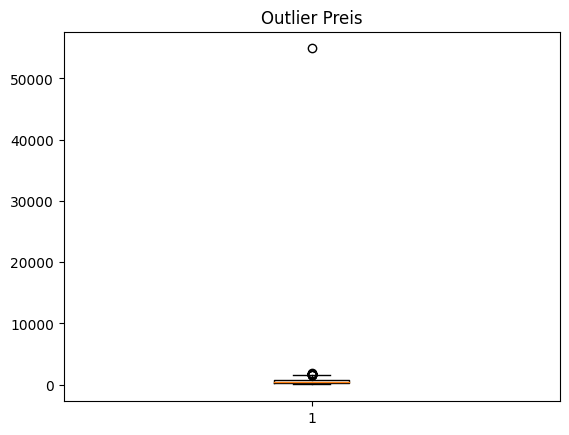

In [57]:
import matplotlib.pyplot as plt

# die Outliers mit Plots visualisieren
# als erstes dafür die Werte in eine Liste extrahieren
preis2 = df_ProdInfo['Preis2']

# Boxplot erstellen
plt.boxplot(preis2)
plt.title('Outlier Preis')
plt.show()


In [58]:
#Sowohl aus der Auswertung .describe wie auch aus der Visualiaisierung ist ersichtlich, dass ein Wert weit über den normalen Preisrange liegt
#Nun identifizieren all diese Zeilen

df_ProdInfo[df_ProdInfo["Preis2"] > 2000]


Preis   Marke Modell Speicher         Farbe  Display Kamera Mobilfunk   
901  54900  realme    GT2     256    Paper Green     6.62    50         5G  \

      Preis2  
901  54900.0

In [59]:
# sieht danach aus, als wären da zwei Nulle zu viel am Ende. Dies anpassen in der Spalte Preis und Preis2
df_ProdInfo.loc[df_ProdInfo["Preis2"] == 54900.0, "Preis2"] = 549.0 
df_ProdInfo.loc[df_ProdInfo["Preis"] == 54900, "Preis"] = 549 

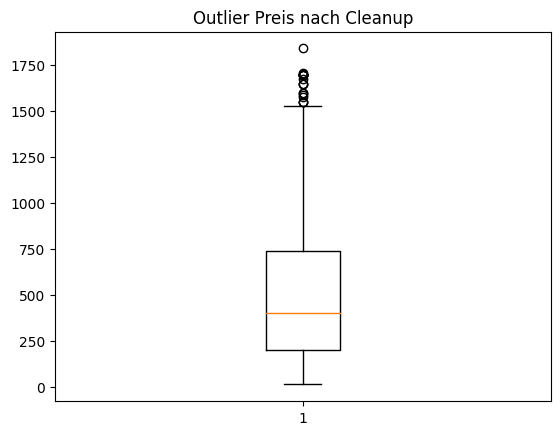

Display       Preis2
count  1444.000000  1444.000000
mean      6.274827   512.085976
std       0.808424   380.804605
min       0.130000    13.900000
25%       6.100000   200.000000
50%       6.500000   404.500000
75%       6.670000   737.250000
max       8.300000  1840.550000

In [60]:
# verifizieren

# die Outliers mit Plots visualisieren
# als erstes dafür die angepassten Werte in eine Liste extrahieren
preis2 = df_ProdInfo['Preis2']

# Boxplot erstellen
plt.boxplot(preis2)
plt.title('Outlier Preis nach Cleanup')
plt.show()

df_ProdInfo.describe()

In [61]:
# ein Wert liegt noch weiter weg von den restlichen - schauen wir diesen mal an

df_ProdInfo[df_ProdInfo["Preis2"] > 1700]


Preis  Marke             Modell Speicher         Farbe  Display Kamera   
481  1707.45  Apple  iPhone 14 Pro Max     512           Gold      6.7    48   \
739  1840.55  Apple      iPhone 14 Pro    1000    Space Black      6.1    48    

    Mobilfunk   Preis2  
481        5G  1707.45  
739        5G  1840.55

In [62]:
#in beiden Fällen handelt es sich um das neuste iPhone Modell. Somit ist der Preis plausibel. Dies wurde auf der Webseite noch verifiziert.
#Letztlich wird die neu erschaffene Spalte 'Preis2' wieder gelöscht

df_ProdInfo.drop(columns=['Preis2'], inplace=True, axis=1)


### Display

In [63]:
#Outliers von Display ebenfalls prüfen
df_ProdInfo.describe()


Display
count  1444.000000
mean      6.274827
std       0.808424
min       0.130000
25%       6.100000
50%       6.500000
75%       6.670000
max       8.300000

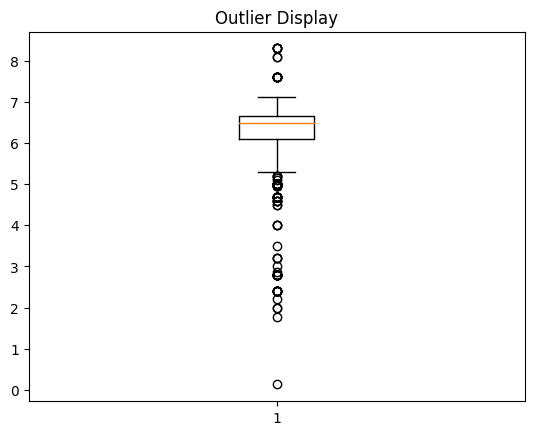

In [64]:
display = df_ProdInfo['Display']

# Boxplot erstellen
plt.boxplot(display)
plt.title('Outlier Display')
plt.show()


In [65]:
# den auffällig tiefen Wert mit fast 0 Zoll genauer untersuchen
df_ProdInfo[df_ProdInfo["Display"] < 2]


Preis    Marke         Modell Speicher     Farbe  Display  Kamera   
218    136  Emporia  Touch Smart 2       8      Black     0.13      8   \
835  29.80  Myphone         Halo A    0.03    Schwarz     1.77   0.30    

    Mobilfunk  
218        4G  
835        3G

In [66]:
#Myphone ist plausibel. Dies ist ein altes Modell von Klapphandy
#Emporia mit 0.13 wieder scheint nicht plausibel zu sein. Gemäss weiterer Recherche sind diverse Werte für dieses Smartphone zu finden.
#Um die Auswertung nicht zu verfälschen werden wir diese Zeile herauslöschen - das ist nicht weiter schlimm, da dieses Handy von Anfang an nicht in die Kategorie Smartphone hätte sein dürfen
#all die weiteren Produkte mit tiefen Zollwerte scheinen alte Klapphandys zu sein, die nicht in die Kategorie Smartphone gehören

df_ProdInfo = df_ProdInfo[df_ProdInfo['Display'] != 0.13]

In [67]:
df_ProdInfo.count()

Preis        1443
Marke        1443
Modell       1443
Speicher     1443
Farbe        1443
Display      1443
Kamera       1443
Mobilfunk    1443
dtype: int64

### Speicher

In [68]:
df_ProdInfo['Speicher'] = df_ProdInfo['Speicher'].astype(float)

In [69]:
df_ProdInfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1443 entries, 0 to 2039
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Preis      1443 non-null   object 
 1   Marke      1443 non-null   object 
 2   Modell     1443 non-null   object 
 3   Speicher   1443 non-null   float64
 4   Farbe      1443 non-null   object 
 5   Display    1443 non-null   float64
 6   Kamera     1443 non-null   object 
 7   Mobilfunk  1443 non-null   object 
dtypes: float64(2), object(6)
memory usage: 101.5+ KB


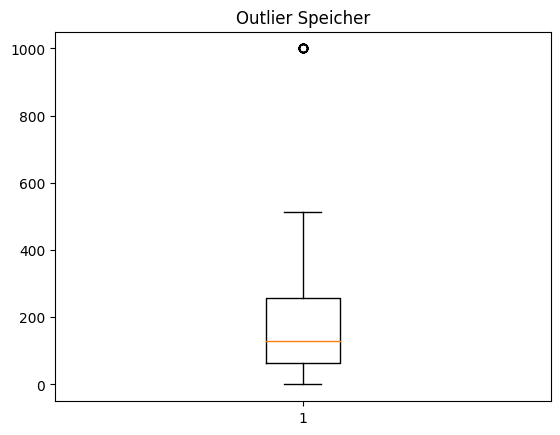

In [70]:
speicher = df_ProdInfo['Speicher']

# Boxplot erstellen
plt.boxplot(speicher)
plt.title('Outlier Speicher')
plt.show()

In [71]:
#ein auffälliger Wert bei 1000 GB
df_ProdInfo[df_ProdInfo["Speicher"] > 600]

Preis    Marke              Modell  Speicher           Farbe  Display   
65       1699  Samsung    Galaxy S23 Ultra    1000.0   Phantom Black      6.8  \
166      1699  Samsung    Galaxy S23 Ultra    1000.0           Green      6.8   
317      1699    Apple   iPhone 14 Pro Max    1000.0     Deep Purple      6.7   
357      1599    Apple       iPhone 14 Pro    1000.0     Deep Purple      6.1   
386      1699    Apple   iPhone 14 Pro Max    1000.0     Space Black      6.7   
413      1699    Apple   iPhone 14 Pro Max    1000.0            Gold      6.7   
449      1279    Apple       iPhone 13 Pro    1000.0            Gold      6.1   
512      1599    Apple       iPhone 14 Pro    1000.0            Gold      6.1   
551      1352    Apple   iPhone 13 Pro Max    1000.0     Sierra Blue      6.7   
572      1699    Apple   iPhone 14 Pro Max    1000.0          Silver      6.7   
596   1374.21    Apple       iPhone 13 Pro    1000.0        Graphite      6.1   
668   1381.09    Apple   iPhone 13 Pro Max    1000.0    Alpine Green      6.7   
670   1381.09    Apple       iPhone 13 Pro    1000.0    Alpine Green      6.1   
739   1840.55    Apple       iPhone 14 Pro    1000.0     Space Black      6.1   
939   1374.21    Apple   iPhone 13 Pro Max    1000.0            Gold      6.7   
940   1381.09    Apple       iPhone 13 Pro    1000.0     Sierra Blue      6.1   
946   1381.09    Apple   iPhone 13 Pro Max    1000.0        Graphite      6.7   
963    880.95  Samsung  Galaxy S10+ (12GB)    1000.0   Ceramic Black      6.4   
1253  1381.09    Apple   iPhone 13 Pro Max    1000.0          Silver      6.7   
1289  1381.09    Apple       iPhone 13 Pro    1000.0          Silver      6.1   

     Kamera Mobilfunk  
65     200         5G  
166    200         5G  
317     48         5G  
357     48         5G  
386     48         5G  
413     48         5G  
449     12         5G  
512     48         5G  
551     12         5G  
572     48         5G  
596     12         5G  
668     12         5G  
670     12         5G  
739     48         5G  
939     12         5G  
940     12         5G  
946     12         5G  
963     16         2G  
1253    12         5G  
1289    12         5G

In [72]:
#verifiziert mit der Homepage. Diese Werte sind valid. Die neusten Versionen vom iPhone bieten auch 1 TB =1000 GB an.

# Spalten erweitern

In [73]:
# Wir haben bereits nach dem Load der CSV-Datei 6 neue Spalten definiert in dem wir eine Spalte aufgesplittet und verteilt haben
# Nun erstellen wir noch weitere hier, die relevant sein könnten

## Neue Spalte 'Produkt'

In [74]:
# die Spalte Marke und Modell zusammen ergeben die gesamte Produktbezeichnung
df_ProdInfo['Produkt'] = df_ProdInfo[['Marke','Modell']].apply(" ".join, axis=1)
df_ProdInfo.head()

Preis    Marke         Modell  Speicher              Farbe  Display   
0   499  Samsung  Galaxy A54 5G     256.0   Awesome Graphite      6.4  \
1   399  Samsung  Galaxy A53 5G     128.0       Awesome Blue      6.5   
2   333   Google       Pixel 6a     128.0           Charcoal      6.1   
3   949  Samsung     Galaxy S23     256.0              Green      6.1   
4   769    Apple      iPhone 14     128.0           Midnight      6.1   

    Kamera Mobilfunk                Produkt  
0      50         5G  Samsung Galaxy A54 5G  
1      64         5G  Samsung Galaxy A53 5G  
2   12.20         5G        Google Pixel 6a  
3      50         5G     Samsung Galaxy S23  
4      12         5G        Apple iPhone 14

## Prozentsatz der Marken

In [75]:
# wir werden berechnen wie starke jede Marke vertreten ist und die in einer neuen Spalte darstellen
# zählen wie oft jede Marke vorkommt
# Prozentsatz berechnen
brand_perc = brand_count / len(df_ProdInfo) * 100
# Wert auf zwei Dezimalstellen runden
brand_perc = brand_perc.round(2)
# neue Spalte erstellen
df_ProdInfo['Marke_Prozent'] = df_ProdInfo['Marke'].map(brand_perc)
df_ProdInfo.head()

Preis    Marke         Modell  Speicher              Farbe  Display   
0   499  Samsung  Galaxy A54 5G     256.0   Awesome Graphite      6.4  \
1   399  Samsung  Galaxy A53 5G     128.0       Awesome Blue      6.5   
2   333   Google       Pixel 6a     128.0           Charcoal      6.1   
3   949  Samsung     Galaxy S23     256.0              Green      6.1   
4   769    Apple      iPhone 14     128.0           Midnight      6.1   

    Kamera Mobilfunk                Produkt  Marke_Prozent  
0      50         5G  Samsung Galaxy A54 5G          17.74  
1      64         5G  Samsung Galaxy A53 5G          17.74  
2   12.20         5G        Google Pixel 6a           2.15  
3      50         5G     Samsung Galaxy S23          17.74  
4      12         5G        Apple iPhone 14          16.29

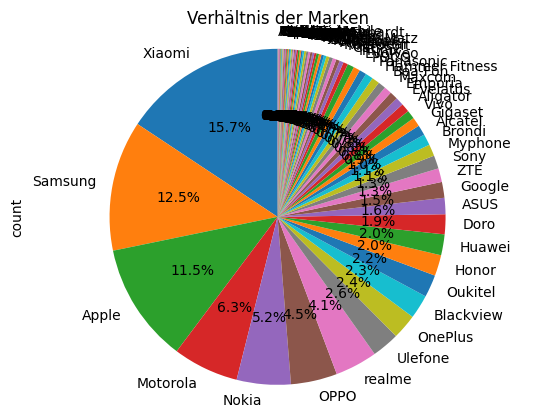

In [76]:
brand_count.plot.pie(autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Verhältnis der Marken')
plt.show()

## Prozentsatz vom Funk

In [77]:
# wir werden berechnen wie starke jede Marke vertreten ist und die in einer neuen Spalte darstellen
# zählen wie oft jede Marke vorkommt
funk_count = df_ProdInfo['Mobilfunk'].value_counts()
# Prozentsatz berechnen
funk_perc = funk_count / len(df_ProdInfo) * 100
# Wert auf zwei Dezimalstellen runden
funk_perc = funk_perc.round(2)
# neue Spalte erstellen
df_ProdInfo['Funk_Prozent'] = df_ProdInfo['Mobilfunk'].map(funk_perc)
df_ProdInfo.head()

Preis    Marke         Modell  Speicher              Farbe  Display   
0   499  Samsung  Galaxy A54 5G     256.0   Awesome Graphite      6.4  \
1   399  Samsung  Galaxy A53 5G     128.0       Awesome Blue      6.5   
2   333   Google       Pixel 6a     128.0           Charcoal      6.1   
3   949  Samsung     Galaxy S23     256.0              Green      6.1   
4   769    Apple      iPhone 14     128.0           Midnight      6.1   

    Kamera Mobilfunk                Produkt  Marke_Prozent  Funk_Prozent  
0      50         5G  Samsung Galaxy A54 5G          17.74         59.04  
1      64         5G  Samsung Galaxy A53 5G          17.74         59.04  
2   12.20         5G        Google Pixel 6a           2.15         59.04  
3      50         5G     Samsung Galaxy S23          17.74         59.04  
4      12         5G        Apple iPhone 14          16.29         59.04

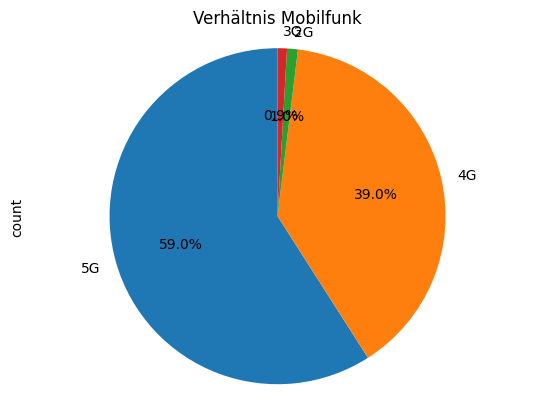

In [78]:
funk_count.plot.pie(autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Verhältnis Mobilfunk')
plt.show()

# Export to CSV

In [ ]:
# DataFrame ins CSV schreiben
file_path = os.path.join(os.getcwd(), '..', 'Vettimayilnathan_Ovija_studentB_Data/Vettimayilnathan_Ovija_studentB_Data_stage3.csv')
df_ProdInfo.to_csv(file_path, index=False)